In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import pickle
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Student Mental health_cleaned.csv')
print(data.head())
print(data.shape)
data = data[["Gender","Age","Course","Year","CGPA","Marital_status","Depression","Anxiety","Panic_attack","Treatment"]]

   Gender  Age  Course  Year  CGPA  Marital_status  Depression  Anxiety  \
0       0   18      14     1     3               0           1        0   
1       1   21      19     2     3               0           0        1   
2       1   19       7     1     3               0           1        1   
3       0   22      21     3     3               1           1        0   
4       1   23      24     4     3               0           0        0   

   Panic_attack  Treatment  
0             1          0  
1             0          0  
2             1          0  
3             0          0  
4             0          0  
(92, 10)


In [ ]:
best_mmc = 0
for i in range(100):
  predict = "Depression"
  x = np.array(data.drop([predict],1))
  y = np.array(data[predict])
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)
  rf = RandomForestClassifier(n_estimators = 100)
  rf.fit(x_train,y_train)
  y_pred = rf.predict(x_test)
  mmc = matthews_corrcoef(y_test,y_pred)
  if mmc>best_mmc:
    best_mmc = mmc
    best_model = rf

y_pred = best_model.predict(x_test)
mmc = matthews_corrcoef(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
precisionScore = precision_score(y_test,y_pred)
recallScore = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)

fileName = "randomForestModel.pickle"
pickle.dump(best_model,open(fileName,'wb'))

print("MMC =",str(mmc))
print("Precision Score =",str(precisionScore))
print("Recall Score =",str(recallScore))
print("f1 Score =",str(f1Score))
print("Accuracy =",str(acc*100)+"%\n")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py

MMC = 1.0
Precision Score = 1.0
Recall Score = 1.0
f1 Score = 1.0
Accuracy = 100.0%



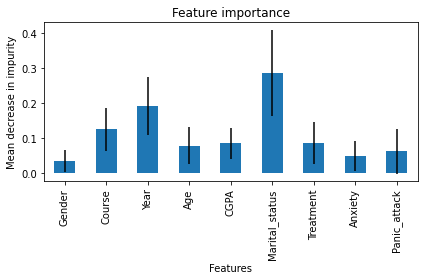

In [ ]:
feature_names = ["Gender","Course","Year","Age","CGPA","Marital_status","Treatment","Anxiety","Panic_attack"]
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel("Features")
fig.tight_layout()